<a href="https://colab.research.google.com/github/ayyucedemirbas/Medical_Img_Seg/blob/main/TotalSegmentator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install TotalSegmentator

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.0/197.0 kB 11.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.5/347.5 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.

In [1]:
!mkdir masks

In [14]:
!mkdir masks2

In [27]:
!TotalSegmentator \
-i /content/Anonymized_20240929.zip \
-o /content/masks \
-ot 'nifti' \
-rs spleen liver stomach pancreas \
--nr_thr_saving 1


If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough segmentation for cropping...
Converting dicom to nifti...
  found image with shape (512, 512, 361)
Resampling...
  Resampled in 4.54s
Predicting...
/usr/local/lib/python3.10/dist-packages/nnunetv2/inference/predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. 

In [3]:
import os

In [4]:
!unzip /content/Anonymized_20240929.zip

Archive:  /content/Anonymized_20240929.zip
 extracting: series-00000/image-00216.dcm  
 extracting: series-00000/image-00159.dcm  
 extracting: series-00000/image-00269.dcm  
 extracting: series-00000/image-00357.dcm  
 extracting: series-00000/image-00124.dcm  
 extracting: series-00000/image-00150.dcm  
 extracting: series-00000/image-00187.dcm  
 extracting: series-00000/image-00129.dcm  
 extracting: series-00000/image-00115.dcm  
 extracting: series-00000/image-00223.dcm  
 extracting: series-00000/image-00350.dcm  
 extracting: series-00000/image-00260.dcm  
 extracting: series-00000/image-00209.dcm  
 extracting: series-00000/image-00206.dcm  
 extracting: series-00000/image-00005.dcm  
 extracting: series-00000/image-00121.dcm  
 extracting: series-00000/image-00046.dcm  
 extracting: series-00000/image-00014.dcm  
 extracting: series-00000/image-00175.dcm  
 extracting: series-00000/image-00163.dcm  
 extracting: series-00000/image-00170.dcm  
 extracting: series-00000/image-0

In [ ]:
import os
import pydicom
import matplotlib.pyplot as plt

# Function to load and display a DICOM file
def show_dicom_image(file_path):
    # Load the DICOM file
    dicom_image = pydicom.dcmread(file_path)

    # Get the pixel array from the DICOM file
    pixel_array = dicom_image.pixel_array

    # Plot the image using matplotlib
    plt.imshow(pixel_array, cmap=plt.cm.gray)
    plt.axis('off')  # Turn off axis labels
    plt.title(f"{os.path.basename(file_path)}")
    plt.show()

# Function to iterate through all .dcm files in a directory
def visualize_dicom_files(directory_path):
    # List all files in the directory
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(".dcm"):
                file_path = os.path.join(root, file)
                show_dicom_image(file_path)



# Specify the directory containing DICOM files
dicom_directory = '/content/series-00000'

# Call the function to visualize all DICOM files in the directory
visualize_dicom_files(dicom_directory)


In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Function to load and visualize all slices of a NIfTI (.nii.gz) file
def show_nii_slices(file_path):
    # Load the NIfTI file
    img = nib.load(file_path)

    # Get the data as a numpy array
    img_data = img.get_fdata()

    # Number of slices in the z-axis
    num_slices = img_data.shape[2]

    # Plot all slices
    for i in range(num_slices):
        plt.imshow(img_data[:, :, i], cmap='gray')
        plt.title(f'Slice {i+1}/{num_slices}')
        plt.axis('off')  # Hide the axes
        plt.show()


# Specify the path to the .nii.gz file
nii_file_path = '/content/masks/spleen.nii.gz'

# Call the function to visualize all slices
show_nii_slices(nii_file_path)


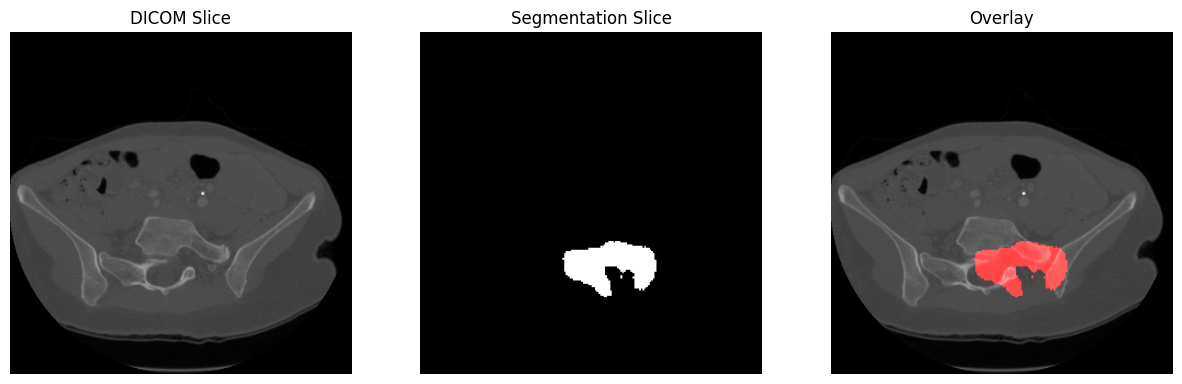

In [24]:
import os
import pydicom
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Function to load and display the 350th DICOM file
def load_dicom_slice(dicom_directory, slice_index):
    # List all files in the directory
    dicom_files = [os.path.join(dicom_directory, f) for f in os.listdir(dicom_directory) if f.endswith('.dcm')]
    dicom_files.sort()  # Sort to ensure consistent ordering

    # Load the DICOM file corresponding to the slice index (350th)
    dicom_file = dicom_files[slice_index - 1]
    dicom_image = pydicom.dcmread(dicom_file)

    # Get the pixel array from the DICOM file
    pixel_array = dicom_image.pixel_array
    return pixel_array

# Function to load the 350th slice from a NIfTI file (segmentation mask)
def load_nii_segmentation(nii_file_path, slice_index):
    # Load the NIfTI file
    img = nib.load(nii_file_path)

    # Get the data as a numpy array
    img_data = img.get_fdata()

    # Return the slice corresponding to the slice index (350th)
    seg_slice = img_data[:, :, slice_index - 1]
    return seg_slice

# Function to overlap DICOM and segmentation mask
def overlay_images(dicom_slice, seg_slice):
    # Normalize both images to [0, 1] for visualization purposes
    dicom_norm = (dicom_slice - np.min(dicom_slice)) / (np.max(dicom_slice) - np.min(dicom_slice))
    seg_mask = seg_slice.astype(bool)  # Convert segmentation to boolean mask

    # Create an RGB image for overlaying: DICOM as grayscale, segmentation as red
    overlay = np.zeros((dicom_norm.shape[0], dicom_norm.shape[1], 3))
    overlay[:, :, 0] = dicom_norm  # Red channel for the segmentation
    overlay[:, :, 1] = dicom_norm  # Green channel for the DICOM
    overlay[:, :, 2] = dicom_norm  # Blue channel for the DICOM
    overlay[seg_mask, 0] = 1  # Make segmentation region red

    return overlay

# Function to visualize DICOM, segmentation, and overlap side by side
def visualize_side_by_side(dicom_slice, seg_slice, overlay):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Display DICOM slice
    axes[0].imshow(dicom_slice, cmap='gray')
    axes[0].set_title('DICOM Slice')
    axes[0].axis('off')

    # Display segmentation slice
    axes[1].imshow(seg_slice, cmap='gray')
    axes[1].set_title('Segmentation Slice')
    axes[1].axis('off')

    # Display overlay
    axes[2].imshow(overlay)
    axes[2].set_title('Overlay')
    axes[2].axis('off')

    plt.show()



# Paths to DICOM directory and NIfTI file
dicom_directory = '/content/series-00000'
nii_file_path = '/content/masks/stomach.nii.gz'

# Load 350th slice from both DICOM and NIfTI
dicom_slice_350 = load_dicom_slice(dicom_directory, 360)
seg_slice_350 = load_nii_segmentation(nii_file_path, 360)

# Create the overlay image
overlay_image = overlay_images(dicom_slice_350, seg_slice_350)

# Visualize all three images side by side
visualize_side_by_side(dicom_slice_350, seg_slice_350, overlay_image)


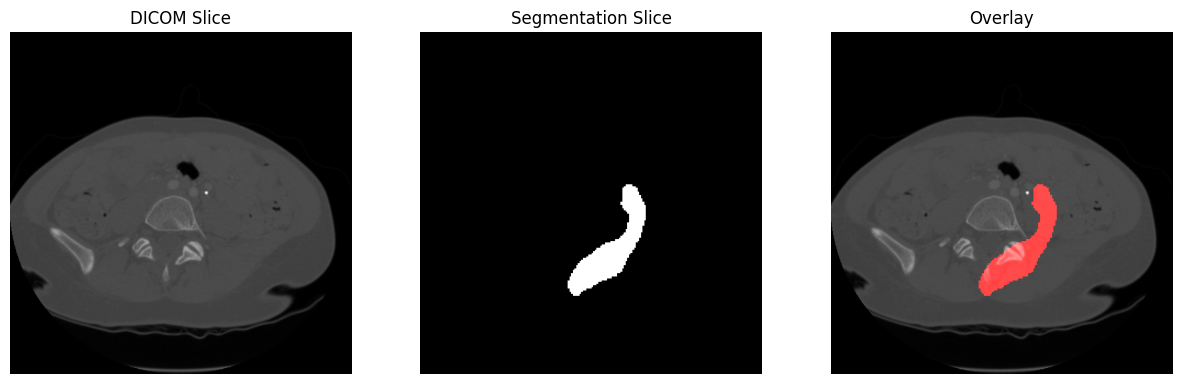

In [26]:
import os
import pydicom
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Function to load and display the 350th DICOM file
def load_dicom_slice(dicom_directory, slice_index):
    # List all files in the directory
    dicom_files = [os.path.join(dicom_directory, f) for f in os.listdir(dicom_directory) if f.endswith('.dcm')]
    dicom_files.sort()  # Sort to ensure consistent ordering

    # Load the DICOM file corresponding to the slice index (350th)
    dicom_file = dicom_files[slice_index - 1]
    dicom_image = pydicom.dcmread(dicom_file)

    # Get the pixel array from the DICOM file
    pixel_array = dicom_image.pixel_array
    return pixel_array

# Function to load the 350th slice from a NIfTI file (segmentation mask)
def load_nii_segmentation(nii_file_path, slice_index):
    # Load the NIfTI file
    img = nib.load(nii_file_path)

    # Get the data as a numpy array
    img_data = img.get_fdata()

    # Return the slice corresponding to the slice index (350th)
    seg_slice = img_data[:, :, slice_index - 1]
    return seg_slice

# Function to overlap DICOM and segmentation mask
def overlay_images(dicom_slice, seg_slice):
    # Normalize both images to [0, 1] for visualization purposes
    dicom_norm = (dicom_slice - np.min(dicom_slice)) / (np.max(dicom_slice) - np.min(dicom_slice))
    seg_mask = seg_slice.astype(bool)  # Convert segmentation to boolean mask

    # Create an RGB image for overlaying: DICOM as grayscale, segmentation as red
    overlay = np.zeros((dicom_norm.shape[0], dicom_norm.shape[1], 3))
    overlay[:, :, 0] = dicom_norm  # Red channel for the segmentation
    overlay[:, :, 1] = dicom_norm  # Green channel for the DICOM
    overlay[:, :, 2] = dicom_norm  # Blue channel for the DICOM
    overlay[seg_mask, 0] = 1  # Make segmentation region red

    return overlay

# Function to visualize DICOM, segmentation, and overlap side by side
def visualize_side_by_side(dicom_slice, seg_slice, overlay):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Display DICOM slice
    axes[0].imshow(dicom_slice, cmap='gray')
    axes[0].set_title('DICOM Slice')
    axes[0].axis('off')

    # Display segmentation slice
    axes[1].imshow(seg_slice, cmap='gray')
    axes[1].set_title('Segmentation Slice')
    axes[1].axis('off')

    # Display overlay
    axes[2].imshow(overlay)
    axes[2].set_title('Overlay')
    axes[2].axis('off')

    plt.show()



# Paths to DICOM directory and NIfTI file
dicom_directory = '/content/series-00000'
nii_file_path = '/content/masks/pancreas.nii.gz'

# Load 350th slice from both DICOM and NIfTI
dicom_slice_350 = load_dicom_slice(dicom_directory, 310)
seg_slice_350 = load_nii_segmentation(nii_file_path, 310)

# Create the overlay image
overlay_image = overlay_images(dicom_slice_350, seg_slice_350)

# Visualize all three images side by side
visualize_side_by_side(dicom_slice_350, seg_slice_350, overlay_image)


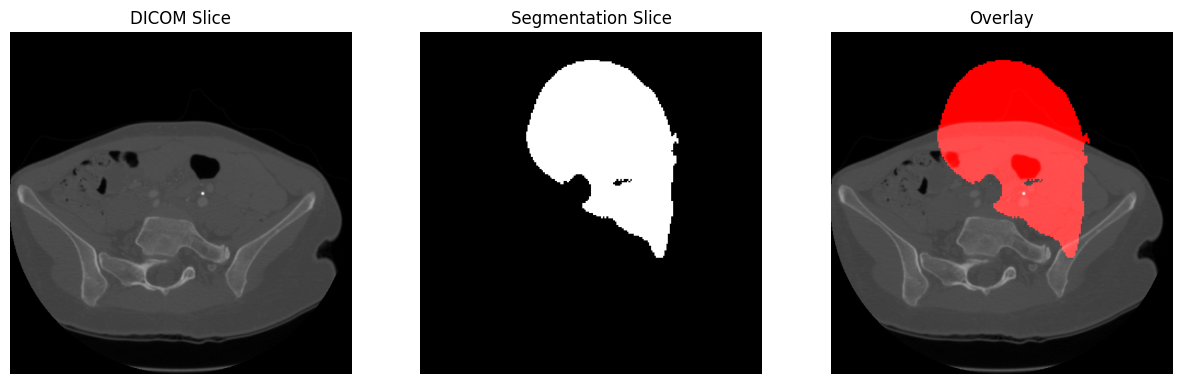

In [28]:
import os
import pydicom
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Function to load and display the 350th DICOM file
def load_dicom_slice(dicom_directory, slice_index):
    # List all files in the directory
    dicom_files = [os.path.join(dicom_directory, f) for f in os.listdir(dicom_directory) if f.endswith('.dcm')]
    dicom_files.sort()  # Sort to ensure consistent ordering

    # Load the DICOM file corresponding to the slice index (350th)
    dicom_file = dicom_files[slice_index - 1]
    dicom_image = pydicom.dcmread(dicom_file)

    # Get the pixel array from the DICOM file
    pixel_array = dicom_image.pixel_array
    return pixel_array

# Function to load the 350th slice from a NIfTI file (segmentation mask)
def load_nii_segmentation(nii_file_path, slice_index):
    # Load the NIfTI file
    img = nib.load(nii_file_path)

    # Get the data as a numpy array
    img_data = img.get_fdata()

    # Return the slice corresponding to the slice index (350th)
    seg_slice = img_data[:, :, slice_index - 1]
    return seg_slice

# Function to overlap DICOM and segmentation mask
def overlay_images(dicom_slice, seg_slice):
    # Normalize both images to [0, 1] for visualization purposes
    dicom_norm = (dicom_slice - np.min(dicom_slice)) / (np.max(dicom_slice) - np.min(dicom_slice))
    seg_mask = seg_slice.astype(bool)  # Convert segmentation to boolean mask

    # Create an RGB image for overlaying: DICOM as grayscale, segmentation as red
    overlay = np.zeros((dicom_norm.shape[0], dicom_norm.shape[1], 3))
    overlay[:, :, 0] = dicom_norm  # Red channel for the segmentation
    overlay[:, :, 1] = dicom_norm  # Green channel for the DICOM
    overlay[:, :, 2] = dicom_norm  # Blue channel for the DICOM
    overlay[seg_mask, 0] = 1  # Make segmentation region red

    return overlay

# Function to visualize DICOM, segmentation, and overlap side by side
def visualize_side_by_side(dicom_slice, seg_slice, overlay):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Display DICOM slice
    axes[0].imshow(dicom_slice, cmap='gray')
    axes[0].set_title('DICOM Slice')
    axes[0].axis('off')

    # Display segmentation slice
    axes[1].imshow(seg_slice, cmap='gray')
    axes[1].set_title('Segmentation Slice')
    axes[1].axis('off')

    # Display overlay
    axes[2].imshow(overlay)
    axes[2].set_title('Overlay')
    axes[2].axis('off')

    plt.show()



# Paths to DICOM directory and NIfTI file
dicom_directory = '/content/series-00000'
nii_file_path = '/content/masks/liver.nii.gz'

# Load 350th slice from both DICOM and NIfTI
dicom_slice_350 = load_dicom_slice(dicom_directory, 360)
seg_slice_350 = load_nii_segmentation(nii_file_path, 360)

# Create the overlay image
overlay_image = overlay_images(dicom_slice_350, seg_slice_350)

# Visualize all three images side by side
visualize_side_by_side(dicom_slice_350, seg_slice_350, overlay_image)


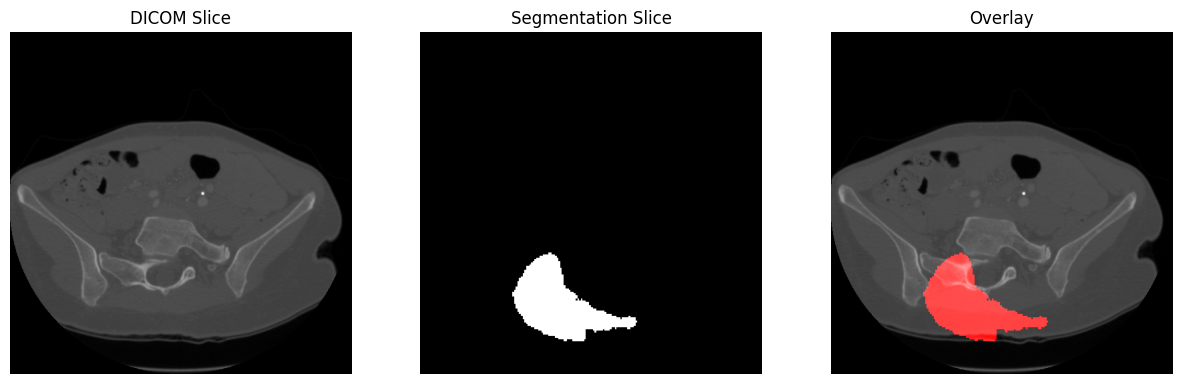

In [29]:
import os
import pydicom
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Function to load and display the 350th DICOM file
def load_dicom_slice(dicom_directory, slice_index):
    # List all files in the directory
    dicom_files = [os.path.join(dicom_directory, f) for f in os.listdir(dicom_directory) if f.endswith('.dcm')]
    dicom_files.sort()  # Sort to ensure consistent ordering

    # Load the DICOM file corresponding to the slice index (350th)
    dicom_file = dicom_files[slice_index - 1]
    dicom_image = pydicom.dcmread(dicom_file)

    # Get the pixel array from the DICOM file
    pixel_array = dicom_image.pixel_array
    return pixel_array

# Function to load the 350th slice from a NIfTI file (segmentation mask)
def load_nii_segmentation(nii_file_path, slice_index):
    # Load the NIfTI file
    img = nib.load(nii_file_path)

    # Get the data as a numpy array
    img_data = img.get_fdata()

    # Return the slice corresponding to the slice index (350th)
    seg_slice = img_data[:, :, slice_index - 1]
    return seg_slice

# Function to overlap DICOM and segmentation mask
def overlay_images(dicom_slice, seg_slice):
    # Normalize both images to [0, 1] for visualization purposes
    dicom_norm = (dicom_slice - np.min(dicom_slice)) / (np.max(dicom_slice) - np.min(dicom_slice))
    seg_mask = seg_slice.astype(bool)  # Convert segmentation to boolean mask

    # Create an RGB image for overlaying: DICOM as grayscale, segmentation as red
    overlay = np.zeros((dicom_norm.shape[0], dicom_norm.shape[1], 3))
    overlay[:, :, 0] = dicom_norm  # Red channel for the segmentation
    overlay[:, :, 1] = dicom_norm  # Green channel for the DICOM
    overlay[:, :, 2] = dicom_norm  # Blue channel for the DICOM
    overlay[seg_mask, 0] = 1  # Make segmentation region red

    return overlay

# Function to visualize DICOM, segmentation, and overlap side by side
def visualize_side_by_side(dicom_slice, seg_slice, overlay):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Display DICOM slice
    axes[0].imshow(dicom_slice, cmap='gray')
    axes[0].set_title('DICOM Slice')
    axes[0].axis('off')

    # Display segmentation slice
    axes[1].imshow(seg_slice, cmap='gray')
    axes[1].set_title('Segmentation Slice')
    axes[1].axis('off')

    # Display overlay
    axes[2].imshow(overlay)
    axes[2].set_title('Overlay')
    axes[2].axis('off')

    plt.show()



# Paths to DICOM directory and NIfTI file
dicom_directory = '/content/series-00000'
nii_file_path = '/content/masks/spleen.nii.gz'

# Load 350th slice from both DICOM and NIfTI
dicom_slice_350 = load_dicom_slice(dicom_directory, 360)
seg_slice_350 = load_nii_segmentation(nii_file_path, 360)

# Create the overlay image
overlay_image = overlay_images(dicom_slice_350, seg_slice_350)

# Visualize all three images side by side
visualize_side_by_side(dicom_slice_350, seg_slice_350, overlay_image)


In [31]:
!TotalSegmentator \
-i /content/s1.zip \
-o /content/masks2 \
-ot 'nifti' \
-rs brain \
--nr_thr_saving 1


If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough segmentation for cropping...
Converting dicom to nifti...
Image orientations not consistent through all slices
---------------------------------------------------------
[1. 0. 0.] [1. 0. 0.]
[0.         0.99812263 0.06124683] [0. 1. 0.]
---------------------------------------------------------
Traceback (most recent call last):
  File "/usr/local/bin/TotalSegmentator", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/totalsegmentator/bin/TotalSegmentator.py", line 138, in main
    totalsegmentator(args.input, args.output, args.ml, args.nr_thr_resamp, args.nr_thr_saving,
  File "/usr/local/lib/python3.10/dist-packages/totalsegmentator/python_api.py", line 434, in totalsegmentator
    organ_seg, _, _ = nnUNet_predict_image(input, None, crop_model_task, model="3d_fullres", folds=[0],
  File "/usr/local/lib/python3.10/dist-packages/totalsegmentator/nnun

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Function to load and visualize all slices of a NIfTI (.nii.gz) file
def show_nii_slices(file_path):
    # Load the NIfTI file
    img = nib.load(file_path)

    # Get the data as a numpy array
    img_data = img.get_fdata()

    # Number of slices in the z-axis
    num_slices = img_data.shape[2]

    # Plot all slices
    for i in range(num_slices):
        plt.imshow(img_data[:, :, i], cmap='gray')
        plt.title(f'Slice {i+1}/{num_slices}')
        plt.axis('off')  # Hide the axes
        plt.show()


# Specify the path to the .nii.gz file
nii_file_path = '/content/masks/liver.nii.gz'

# Call the function to visualize all slices
show_nii_slices(nii_file_path)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
test_load = nib.load('/content/masks/spleen.nii.gz').get_fdata()
test_load.shape

(512, 512, 361)

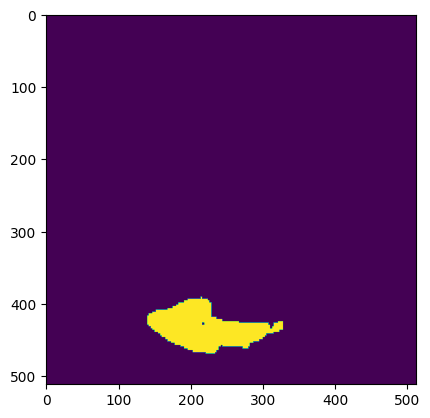

In [ ]:
test = test_load[:,:,300]
plt.imshow(test)
plt.show()

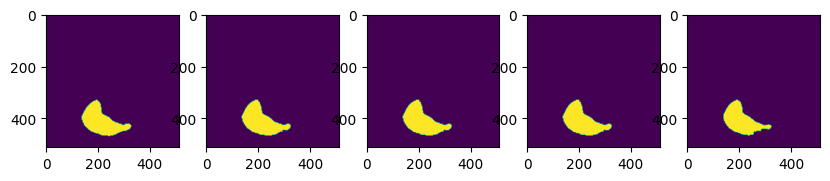

In [ ]:
for i in range(5):
    plt.subplot(5, 5,i + 1)
    plt.imshow(test_load[:,:,355 + i])
    plt.gcf().set_size_inches(10, 10)
plt.show()

In [ ]:
!pwd

/content


https://www.dicomlibrary.com/

In [ ]:
totalsegmentator("/content/Anonymized_20240929.zip", ".")


If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Converting dicom to nifti...


Downloading:  50%|████▉     | 117M/234M [03:46<03:46, 515kB/s] 


  found image with shape (512, 512, 361)
Resampling...
  Resampled in 5.44s
Predicting part 1 of 5 ...


/usr/local/lib/python3.10/dist-packages/nnunetv2/inference/predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(join(model_trai

Predicting part 2 of 5 ...


/usr/local/lib/python3.10/dist-packages/nnunetv2/inference/predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(join(model_trai

Predicting part 3 of 5 ...


100%|██████████| 4/4 [00:00<00:00, 16.73it/s]


Predicting part 4 of 5 ...


100%|██████████| 4/4 [00:00<00:00, 14.57it/s]


Predicting part 5 of 5 ...


100%|██████████| 4/4 [00:00<00:00, 80.88it/s]


  Predicted in 75.54s
Resampling...
Saving segmentations...


  0%|          | 0/117 [00:00<?, ?it/s]

  Saved in 110.78s


In [ ]:
if __name__ == "__main__":
    # option 1: provide input and output as file paths
    #totalsegmentator(input_path, output_path)

    # option 2: provide input and output as nifti image objects
    #input_img = nib.load(input_path)
    #output_img = totalsegmentator(input_img)
    #nib.save(output_img, output_path)

In [ ]:
!mkdir abdomen_seg

In [ ]:
!TotalSegmentator -i /content/Anonymized_20240929.zip -o abdomen_seg --task total


If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Converting dicom to nifti...
  found image with shape (512, 512, 361)
Resampling...
  Resampled in 5.74s
Predicting part 1 of 5 ...
/usr/local/lib/python3.10/dist-packages/nnunetv2/inference/predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `w